In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

%matplotlib inline

In [3]:
df = pd.read_csv('../src/data/preprocessed_data.csv')

In [4]:
df.head()

,Winner,title_bout,no_of_rounds,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,...,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Sideways,R_Stance_Southpaw,R_Stance_Switch
0,Red,False,3,0.642578,0.000000,0.513730,0.408164,0.721738,0.012266,0.000000,...,False,False,False,True,False,False,False,False,True,False
1,Red,False,3,0.000000,0.578125,0.634453,0.593281,0.052656,0.084375,0.000000,...,False,True,False,False,False,False,False,False,False,True
2,Blue,False,3,0.000000,0.000000,0.475000,0.470000,0.250000,0.000000,0.000000,...,False,True,False,False,False,False,True,False,False,False
3,Red,False,3,0.000000,0.000000,0.470000,0.460000,0.350000,0.000000,0.000000,...,False,True,False,False,False,False,True,False,False,False
4,Red,False,3,0.001953,0.125000,0.486494,0.597637,0.861641,0.135410,0.251953,...,False,True,False,False,False,False,True,False,False,False


### Normalizing data

In [5]:
df_num = df.select_dtypes(include=[float, int]) # selecting only the numerical data.


In [6]:
df_num.dtypes

no_of_rounds               int64
B_avg_KD                 float64
B_avg_opp_KD             float64
B_avg_SIG_STR_pct        float64
B_avg_opp_SIG_STR_pct    float64
                          ...   
R_Height_cms             float64
R_Reach_cms              float64
R_Weight_lbs             float64
B_age                    float64
R_age                    float64
Length: 151, dtype: object

In [7]:
scaler = StandardScaler()

df[list(df_num.columns)] = scaler.fit_transform(df[list(df_num.columns)])
# Transform the data by centering around column mean and dividing by std deviation.
df

,Winner,title_bout,no_of_rounds,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,...,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Sideways,R_Stance_Southpaw,R_Stance_Switch
0,Red,False,-0.245963,1.308896,-0.471767,0.437735,-0.322780,1.908850,-1.005698,-0.603696,...,False,False,False,True,False,False,False,False,True,False
1,Red,False,-0.245963,-0.600150,1.466921,1.508838,1.300844,-0.907790,-0.697070,-0.603696,...,False,True,False,False,False,False,False,False,False,True
2,Blue,False,-0.245963,-0.600150,-0.471767,0.094102,0.219570,-0.077031,-1.058194,-0.603696,...,False,True,False,False,False,False,True,False,False,False
3,Red,False,-0.245963,-0.600150,-0.471767,0.049740,0.131862,0.343940,-1.058194,-0.603696,...,False,True,False,False,False,False,True,False,False,False
4,Red,False,-0.245963,-0.594347,-0.052591,0.196083,1.339045,2.497798,-0.478641,-0.194406,...,False,True,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8009,Red,False,-3.474712,-0.600150,-0.471767,0.720717,-0.756180,0.369593,-0.523196,0.005479,...,False,True,False,False,False,False,False,False,True,False
8010,Red,False,-3.474712,-0.600150,-0.471767,0.720717,-0.756180,0.369593,-0.523196,0.005479,...,False,True,False,False,False,False,True,False,False,False
8011,Red,False,-3.474712,-0.600150,-0.471767,0.720717,-0.756180,0.369593,-0.523196,0.005479,...,False,True,False,False,False,False,True,False,False,False
8012,Red,False,-3.474712,-0.600150,-0.471767,0.720717,-0.756180,0.369593,-0.523196,0.005479,...,False,True,False,False,False,False,True,False,False,False


### Splitting into train, test

In [8]:
y = df['Winner']
X = df.drop(columns = 'Winner') # Remove target from features, training data can't have answers.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=43)

### Fitting baseline Random Forest

In [9]:
model = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=43)

In [10]:
model.fit(X_train, y_train)

RandomForestClassifier(oob_score=True, random_state=43)

In [11]:
model.oob_score_

0.6754236174963878

In [12]:
y_preds = model.predict(X_test)

In [13]:
accuracy_score(y_test, y_preds)

0.7032418952618454

In [14]:
feat_imps = {}
for i, imp in enumerate(model.feature_importances_):
    feat_imps[X_train.columns[i]] = imp

In [15]:
sorted_imp_feats = (sorted(feat_imps.items(), key = lambda x: x[1], reverse=True))
sorted_imp_feats

[('B_SLpM', 0.02870590906018175),
 ('B_TD_Def', 0.020771210878045992),
 ('R_SApM', 0.016620719290113998),
 ('B_Str_Acc', 0.015823926117293587),
 ('B_TD_Avg', 0.013029570280702061),
 ('R_TD_Acc', 0.012754586334383738),
 ('B_SApM', 0.012658615192851379),
 ('R_SLpM', 0.012230984294837153),
 ('B_Str_Def', 0.012023731346105335),
 ('B_TD_Acc', 0.011837641202889741),
 ('R_Str_Acc', 0.011494177747033802),
 ('R_age', 0.011307538894743435),
 ('R_TD_Def', 0.010554274299394449),
 ('R_avg_opp_HEAD_landed', 0.010553752037740885),
 ('R_TD_Avg', 0.010540451699458076),
 ('R_avg_opp_SIG_STR_pct', 0.01051863714602055),
 ('R_Sub_Avg', 0.009888212382760664),
 ('R_Str_Def', 0.009692509377219128),
 ('B_age', 0.009001000808785402),
 ('R_avg_GROUND_att', 0.008733847364155658),
 ('B_avg_DISTANCE_landed', 0.008619770741183431),
 ('R_avg_opp_BODY_att', 0.008565916097229998),
 ('R_avg_CTRL_time(seconds)', 0.008434212655756768),
 ('B_avg_HEAD_att', 0.00839784969560905),
 ('R_losses', 0.008105941360207434),
 ('B_avg

In [16]:
y_train.value_counts()

Winner
Red     4926
Blue    2687
Name: count, dtype: int64

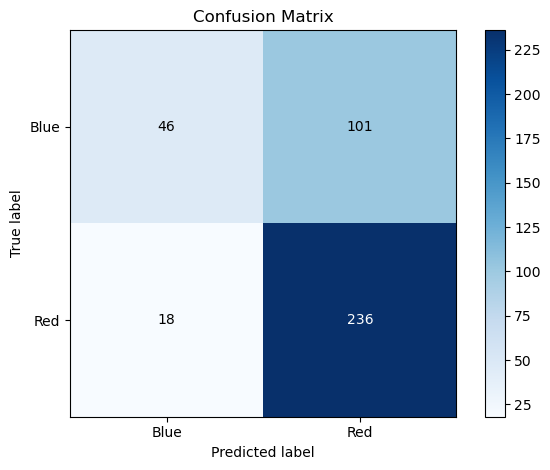

In [17]:
cm = confusion_matrix(y_test, y_preds)
classes = unique_labels(y_test, y_preds)

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
# We want to show all ticks...
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       # ... and label them with the respective list entries
       xticklabels=classes, yticklabels=classes,
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')
# Loop over data dimensions and create text annotations.
fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
ax
plt.show()

### Oversampling

In [18]:
from imblearn.over_sampling import ADASYN

In [19]:
over_sampler = ADASYN()
X_resampled, y_resampled = over_sampler.fit_resample(X_train, y_train)

In [20]:
pd.Series(y_resampled).value_counts()

Winner
Blue    4969
Red     4926
Name: count, dtype: int64

In [21]:
model2 = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=43)
model2.fit(X_resampled, y_resampled)

RandomForestClassifier(oob_score=True, random_state=43)

In [22]:
model2.oob_score_

0.7802930773117737

In [23]:
y2_preds = model2.predict(X_test)

In [24]:
accuracy_score(y_test, y2_preds)

0.7107231920199502

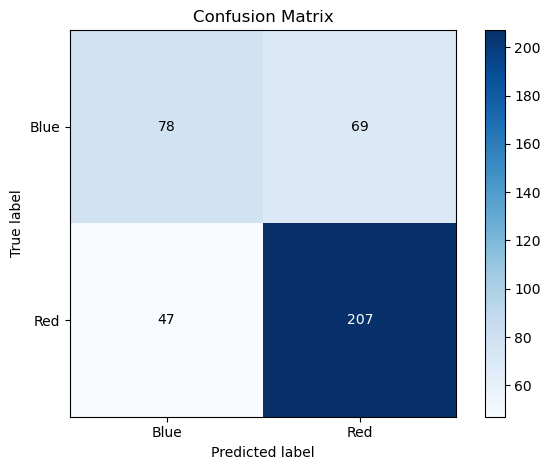

In [25]:
cm = confusion_matrix(y_test, y2_preds)
classes = unique_labels(y_test, y2_preds)

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes, yticklabels=classes,
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')

fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
ax
plt.show()

In [33]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

param_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['sqrt', 'log2'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [34]:
model3 = RandomForestClassifier(random_state=43)
rf_random = RandomizedSearchCV(estimator = model3, param_distributions = param_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_resampled, y_resampled)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=43),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [35]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 70,
 'bootstrap': False}

In [36]:
model4 = rf_random.best_estimator_

In [37]:
y3_preds = model4.predict(X_test)
accuracy_score(y_test, y3_preds)

0.7182044887780549

In [40]:
new_param_grid = {'bootstrap': [True, False],
 'max_depth': [50, 60, 70],
 'max_features': ['sqrt'],
 'min_samples_leaf': [1, 2, 3],
 'min_samples_split': [2, 3, 4],
 'n_estimators': [600, 800, 1000, 1200],
'criterion' :['gini']}

In [ ]:
rf = RandomForestClassifier(random_state=43)
rf_grid = GridSearchCV(estimator = rf, param_grid = new_param_grid, 
                                cv = 3, verbose=2, n_jobs = -1)
rf_grid.fit(X_resampled, y_resampled)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


In [ ]:
rf_grid.best_params_

In [ ]:
model5 = rf_grid.best_estimator_

In [ ]:
y4_preds = model5.predict(X_test)
accuracy_score(y_test, y4_preds)

In [ ]:
cm = confusion_matrix(y_test, y4_preds)
classes = unique_labels(y_test, y4_preds)

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes, yticklabels=classes,
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')

fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
ax

In [ ]:
print(classification_report(y_test, y_preds))

In [ ]:
print(classification_report(y_test, y2_preds))

In [ ]:
print(classification_report(y_test, y3_preds))

In [ ]:
print(classification_report(y_test, y4_preds))